In [5]:
# 데이터 파일의 상단 부분 일부를 출력. 윈도우즈 환경에는 미작동
!head train_prob.csv

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


# Preparation

In [1]:
# 패키지를 불러 온다.
import sys
import pandas as pd
import numpy as np
import sklearn
import scipy
import mlxtend

# 사용하는 패키지의 버젼을 출력.
# 본 노트북은 DS 시험장 환경 기준으로 작성되었고, 출력 또한 시험장 환경 기준으로 생성 되었습니다.
# Python - 3.7.4 , pandas 0.25.1, numpy 1.18.5, sklearn 0.21.3, scipy 1.5.2
print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend]:
    print(i.__name__, i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0


In [2]:
# 시각화 모듈, 문제 풀이와는 상관은 없지만 참고 삼을 만한 내용을 출력하기 위해 들여옵니다.
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 시각화 모듈을 불러오고, 한글 폰트를 설정  
import matplotlib as mpl
import matplotlib.font_manager as fm

#plt.rc('font', family='NanumBarunGothic') 
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# train_prob.csv를 불러 온다
# dtype은 크기가 작은 정수라 in8을 지정했지만, 시험에서는 이런 수고를 굳이 들일 필요는 없습니다.
# index_col은 인덱스 역할을 하는 id를 컬럼을 index로 지정
df_train = pd.read_csv('train_prob.csv', index_col='id')

In [4]:
# 데이터셋의 구성과 함께, 결측치도 확인한다.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 0 to 26569
Data columns (total 25 columns):
product_code      21458 non-null object
loading           21257 non-null float64
attribute_0       21458 non-null object
attribute_1       21458 non-null object
attribute_2       21458 non-null int64
attribute_3       21458 non-null int64
measurement_0     21458 non-null int64
measurement_1     21458 non-null int64
measurement_2     21458 non-null int64
measurement_3     21146 non-null float64
measurement_4     21016 non-null float64
measurement_5     20893 non-null float64
measurement_6     20818 non-null float64
measurement_7     20692 non-null float64
measurement_8     20605 non-null float64
measurement_9     20469 non-null float64
measurement_10    20399 non-null float64
measurement_11    20278 non-null float64
measurement_12    20171 non-null float64
measurement_13    20063 non-null float64
measurement_14    19976 non-null float64
measurement_15    19855 non-null float64
me

In [5]:
# 수치형 변수의 기술 통계 출력
# 컬럼이 변수 단위로 출력이 되는 것을 T 어트리뷰트를 사용하여 행단위로 변수가 구성되도록 합니다.
df_train.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
loading,21257.0,127.680897,38.987953,33.160,100.01000,122.2500,148.77000,385.860
attribute_2,21458.0,6.933684,1.585791,5.000,5.00000,6.0000,8.00000,9.000
attribute_3,21458.0,7.535977,1.474057,5.000,8.00000,8.0000,8.00000,9.000
measurement_0,21458.0,7.311912,4.261533,0.000,4.00000,7.0000,10.00000,29.000
measurement_1,21458.0,7.861264,4.152362,0.000,5.00000,8.0000,10.00000,28.000
measurement_2,21458.0,6.016917,3.299464,0.000,4.00000,6.0000,8.00000,24.000
measurement_3,21146.0,17.795325,1.002861,13.968,17.11825,17.7910,18.47300,21.499
measurement_4,21016.0,11.736571,0.997623,8.008,11.05400,11.7370,12.41800,16.484
measurement_5,20893.0,17.130985,0.996501,12.073,16.44700,17.1360,17.80800,21.425
measurement_6,20818.0,17.507452,0.995234,13.566,16.83600,17.5150,18.18075,21.543


In [6]:
# 테스트셋도 불러옵니다.
df_test = pd.read_csv('test_prob.csv', dtype={'failure': 'int8', 'attribute_2': 'int8', 'attribute_3': 'int8'}, index_col='id')
df_test.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
16115,D,76.89,material_7,material_5,6,6,16,2,7,17.427,...,18.241,11.536,14.690,19.622,11.082,16.323,15.633,16.153,15.640,648.974
16116,D,96.13,material_7,material_5,6,6,9,10,5,18.014,...,19.056,10.746,NaN,18.475,10.174,15.710,16.274,12.229,17.204,741.103
16117,D,124.40,material_7,material_5,6,6,10,15,0,18.374,...,20.689,10.240,16.035,18.224,11.005,15.925,16.257,16.338,17.653,NaN
16118,D,175.84,material_7,material_5,6,6,4,8,15,18.056,...,19.442,12.015,18.195,19.410,10.761,16.176,16.926,13.813,13.615,NaN
16119,D,118.70,material_7,material_5,6,6,15,8,5,16.513,...,19.007,12.615,15.775,18.778,9.683,NaN,17.066,14.690,18.798,NaN


In [7]:
df_test.describe().T 

,count,mean,std,min,25%,50%,75%,max
loading,5063.0,128.436423,39.204131,42.000,99.91500,123.0500,150.58500,324.570
attribute_2,5112.0,6.000000,0.000000,6.000,6.00000,6.0000,6.00000,6.000
attribute_3,5112.0,6.000000,0.000000,6.000,6.00000,6.0000,6.00000,6.000
measurement_0,5112.0,7.852308,3.408803,0.000,5.00000,7.0000,10.00000,27.000
measurement_1,5112.0,9.790884,4.034857,0.000,7.00000,9.0000,12.00000,29.000
measurement_2,5112.0,7.262520,3.157005,0.000,5.00000,7.0000,9.00000,24.000
measurement_3,5043.0,17.775605,0.994144,14.470,17.10400,17.7610,18.44750,21.267
measurement_4,5016.0,11.712784,0.989484,8.250,11.04100,11.7170,12.37825,15.102
measurement_5,5001.0,17.114512,0.996038,13.687,16.43000,17.1160,17.79400,20.620
measurement_6,4956.0,17.524651,0.999084,12.715,16.84775,17.5175,18.16400,21.329


In [8]:
df_train.describe(include='all').loc['mean': 'std', 'measurement_3':'measurement_17'].round(3)

,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
mean,17.795,11.737,17.131,17.507,11.718,19.023,11.430,16.034,19.193,11.733,15.666,16.033,15.050,16.397,701.531
std,1.003,0.998,0.997,0.995,0.999,1.010,0.997,1.311,1.622,1.475,1.188,1.514,1.533,1.740,119.520


# 전처리

**출제자 노트**

전처리 과정은 문제에서 제공하는 수식을 해석하고 의도를 파악하는 것을 연습하는데에 중점을 두었습니다. 실제 시험에서도 문제 설명량의 커서 이에 대한 압박을 겪을 수 있습니다. 이에 당황하여 솔루션 찾는데 힘들 수 있지만, 이를 제대로 해석하고 제공하는 힌트와 가이드를 보고 대처한다면, 생각외로 쉽게 해결책을 마련할 수 있습니다.

## 단계 1

### 방법 1.

DataFrame 단위로 추가

In [9]:
df_basetable = df_train.copy()
df_basetable[['isna_{}'.format(i) for i in range(3, 18)]] = \
             df_train[['measurement_{}'.format(i) for i in range(3, 18)]].isna()

### 방법 2. 

pandas 버젼에 따라, 복수의 Series를 추가할 경우 데이터프레임이 파편화 되어 성능이 떨어진다는 경고를 받을 수 있다.

성능 저하를 피하기 위한 방법으로 Series를 만들어 두고 나중에 concat으로 결합하면 성능 저하를 막을 수 있다.

In [10]:
# table의 다수의 컬럼을 직접 추가하면 성능 이슈 경고가 나오니, 이를 피하기 위해 concat 메소드를 씁니다.
na_cols = [df_train]
for i in range(3, 18):
    na_cols.append(df_train['measurement_{}'.format(i)].isna().rename('isna_{}'.format(i)))
df_basetable = pd.concat(na_cols, axis=1) # 최종 과정을 거친 데이터셋의 명인 basetable을 따서 df_basetable을  생성

### 방법 3.

직접 추가.

이 경우에는 추가하는 열의 수가 많지 않으므로, 성능 Warning이 발생하지 않는다.

In [11]:
df_basetable = df_train.copy()
for i in range(3, 18):
    df_basetable['isna_{}'.format(i)] = df_train['measurement_{}'.format(i)].isna()

## 단계 2

**출제자 노트** 

원래 내용은 IterativeImputer를 사용하지 않고, LinearRegression을 이용하여 보다 정교한 결측값을 복원하는 것이 었는데, 복잡도가 크다는 의견이 있었고, 이 점이 타당하다고 판단되어 이를 IterativeImputer를 이용하는 방향으로 바꾼 것입니다. 이전의 문제를 버리기에는 아까워서 소개를 합니다.

In [12]:
"""
본 내용은 실행시 이후 결과가 다를 수 있어, 혼란을 피하기 위해 주석 처리합니다.

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

m_cols = ['measurement_{}'.format(i) for i in range(3, 10)] # 편의를 위해 measurement3~measurement9까지 컬럼값을 담는 리스트를 만든다.
df_examine = df_org.loc[df_org[m_cols + ['measurement_17']].notna().all(axis=1)] # m_cols와 measuement_17에서 결측치가 없는 데이터프레임 df_examine을 만든다.
df_org['measurement_17'].isna().sum() # measurement_17의 결측치 확인
len(df_examine), len(df_org)

lr = Lasso()
pc_list = [] # coef 데이터프레임 구성을 위해 처리한 product_code 저장 
coef_list = [] # 마찬가지로 회귀계수 저장
impute_cnt = []
for k, v in df_examine.groupby('product_code'): # groupby를 이용하여 product_code 별로 구분하여 데이터프레임의 행들을 나누어 가져온다.
    lr.fit(v[m_cols],v['measurement_17']) # 학습
    print(k, lr.coef_, r2_score(v['measurement_17'], lr.predict(v[m_cols]))) # 결과 확인
    coef_ = lr.coef_.copy() # 복사
    avail_cols = np.array(m_cols)[coef_ != 0] # 연관성이 있는 속성명을 뽑아 낸다, 작업을 편하게 하기 위해 list를 numpy array로 바꾼다.
    pc_list.append(k) # 처리한 product_code를 저장
    coef_list.append(coef_) # 도출한 회귀계수 저장
    # 현재 복원 스텝을 진행하는 product_code 에서 연관성이 있는 속성이 결측이 없고 measurement_17은 결측인 행을 뽑기 위한  Boolean 인덱싱 행을  만든다.
    target_cond = (df_basetable['product_code'] == k) & df_basetable[avail_cols].notna().all(axis=1) & df_basetable['measurement_17'].isna()
    impute_cnt.append(target_cond.sum())
    # 결측치를 예측하고 입력한다. loc를 행을 선택후 값을 지정할 때에, 대입하는 값의 수가 일치하면, 인덱스와 상관없이 순서대로 대입이 되게 된다. 
    df_basetable.loc[target_cond, 'measurement_17'] = lr.predict(df_basetable.loc[target_cond][m_cols].fillna(0))
df_coef = pd.DataFrame(np.vstack(coef_list), columns=lr.feature_names_in_, index=pc_list) # coef 데이터프레밍 생성
df_coef.head()

"""
print("")

In [13]:
df_basetable_bak = df_basetable.copy() # 여러 방법을 보이기 위해 백업

### 방법1

In [14]:
# train에 나왔던 product_code가 나오지 않으므로 test는 별도의 복원 모델을 사용하면 됩니다.
# 요건 Kaggle 형에서
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

itr_cols = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
for c in df_basetable['product_code'].unique():
    imp = IterativeImputer(LinearRegression(), random_state=123)
    # df_basetable.loc[df_basetable['product_code']][iter_cols] = ... 은 reference warning을 유발시키고, 오작동의 소지가 있습니다.
    # 일부분을 대치할 경우 아래처럼 loc[filter 조건, 컬럼명]으로 대치를 권고합니다 (Pandas Guide 내용) 
    df_basetable.loc[df_basetable['product_code'] == c, itr_cols] = \
            imp.fit_transform(df_basetable.loc[df_basetable['product_code'] == c, itr_cols])

### 방법2

In [15]:
# GroupBy를 이용한 버젼
df_basetable = df_basetable_bak.copy()
itr_cols = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
df_basetable[itr_cols] = df_basetable.groupby('product_code', group_keys=False)[itr_cols]\
            .apply(lambda x: pd.DataFrame(IterativeImputer(LinearRegression(), random_state=123).fit_transform(x[itr_cols]), 
                                         index=x.index, columns=itr_cols))

## 단계 3

 만일 train과 test에  product_code가 섞여 나온다면, train과 test의 내용을 결합하여 평균을 구해야겠지만,
 
 train에 나왔던 product_code가 test에는 나오지 않으므로 train에 썼던 평균을 테스트에 쓸 필요는 없어 별도로 진행 가능합니다
 
 데이터의 구성을 간단하게 살펴 보는 것이 구현 복잡도를 결정할 수 있으니 요약 정보를 유심히 보는 것이 
 
 이런 경우에 도움이 됩니다.
 
 test는 Kaggle형 에서...

In [16]:
# 여러 방법을 시도해도 문제 없게 처리 이전에 값을 저장해 둔 것이니, 
# 실전에서는 불필요한 사항입니다. 이점 유념 바랍니다.
df_basetable_bak = df_basetable.copy() # (실습을 위한 코드)

### 방법 1

Groupby - Transform을 이용한 방법

대상열을 한번에

In [17]:
df_basetable = df_basetable_bak.copy() # 여러 번 실행해 봐도 문제 없도록 처리 이전 값으로 복원. (실습을 위한 코드)

cols = ['measurement_{}'.format(i) for i in range(10, 17)]
# groupby를 통해 나온 집계값을 바로 사용할 경우에 transform을 이용하면 편합니다.
df_basetable[cols] = df_basetable.groupby('product_code')[cols].transform(lambda x: x.fillna(x.mean()))

In [18]:
m_cols = ['measurement_{}'.format(i) for i in range(0, 18)]
# (1) 평균을 구한다.
# (2) 소수점 3 째자리 까지 반올림 한다.
# (3) 컬럼명을 바꾼다.
df_basetable[m_cols[3:]].apply(['mean', 'std'])\
                .applymap(lambda x: round(x, 3))\
                .rename(columns=lambda x: x.split('_')[1])

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean,17.796,11.736,17.131,17.506,11.719,19.022,11.434,16.034,19.194,11.734,15.666,16.033,15.051,16.398,701.768
std,0.997,0.994,0.994,0.992,0.993,1.005,0.997,1.278,1.579,1.433,1.149,1.461,1.478,1.671,119.180


### 방법 2

반복문을 이용한 방법

열별로 따로 따로 처리

In [19]:
# 방법 2 - 반복문을 이용
# 위에 방법 보다 직관적이지만 구현할 것이 많다.
df_basetable = df_basetable_bak.copy() # 처리 이전 값 복원
for i in df_basetable['product_code'].unique():
    df_basetable.loc[df_basetable['product_code'] == i, m_cols] = \
            df_basetable.loc[df_basetable['product_code'] == i, m_cols].fillna(
                df_basetable.loc[df_basetable['product_code'] == i, m_cols].mean()
            )

In [20]:
m_cols = ['measurement_{}'.format(i) for i in range(0, 18)]
df_basetable[m_cols[3:]].apply(['mean', 'std'])\
                .applymap(lambda x: round(x, 3))\
                .rename(columns=lambda x: x.split('_')[1])

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean,17.796,11.736,17.131,17.506,11.719,19.022,11.434,16.034,19.194,11.734,15.666,16.033,15.051,16.398,701.768
std,0.997,0.994,0.994,0.992,0.993,1.005,0.997,1.278,1.579,1.433,1.149,1.461,1.478,1.671,119.180


# 문제 1

**출제자 노트**

확률, 통계, 검정의 개념을 하나의 문제에 담았습니다. 복합적인 응용을 연습하고자 고안한 문제입니다. 단계를 두어 원하는 결과를 도출할 수 있도록 했으니 각 단계에서 필요로 하는 개념을 생각하여 적용하면 답을 뽑을 수 있습니다. 이 문제를 접근법은 Lv3 이론 교재 47-49페이지를 참조하면 됩니다.

## 단계 1-1

In [63]:
P_true = 0.2114
P_var = P_true * (1 - P_true)

In [64]:
n_samples = df_basetable['isna_3'].sum()
P_missing_true = df_basetable.loc[df_basetable['isna_3'], 'failure'].mean()
n_samples, P_missing_true

(312, 0.14423076923076922)

In [65]:
# 위 사건은 베르눌리 사건에 해당한다, 
# P_missing_true 확률이면서, 평균에 해당된다.

P_missing_var = P_true * (1- P_true) / n_samples
P_missing_std = P_missing_var ** 0.5

In [66]:
# 방법.1
from scipy.stats import norm

if P_missing_true < P_true:
    pvalue = norm.cdf(P_missing_true, loc=P_true, scale=P_missing_std) * 2
else:
    pvalue = (1 - norm.cdf(P_missing_true, loc=P_true, scale=P_missing_std)) * 2
P_missing_true, pvalue

(0.14423076923076922, 0.0036630709140241546)

### 방법 2

In [67]:
# 방법.2 표준화
pvalue = norm.cdf(-abs((P_missing_true - P_true) /  P_missing_std)) * 2
pvalue

0.0036630709140241546

### 방법 3

이론 수업 때 썼던 statsmodels에 있는 함수를 이용한 방법

In [68]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(count=df_basetable.loc[df_basetable['isna_3'], 'failure'].sum(), nobs=n_samples,
                     value=P_true, prop_var=P_true, alternative='two-sided')

(-2.905807189028007, 0.0036630709140241546)

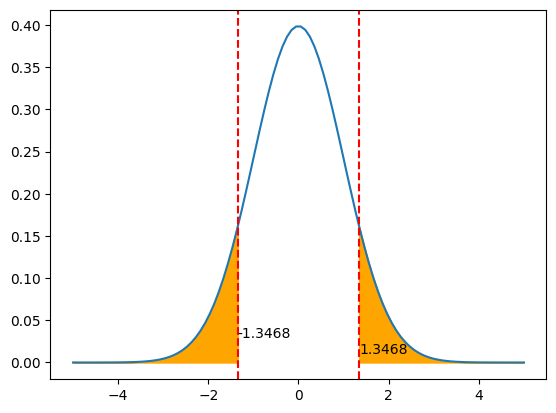

In [77]:
# 표준정규 분포를 이용한 pvalue 도출을 그래프로 설명
col = 'isna_{}'.format(4)
P_var = P_true * (1 - P_true)
n_samples = df_basetable[col].sum()
P_missing_true = df_basetable.loc[df_basetable[col], 'failure'].mean()
P_missing_var = P_var / n_samples
P_missing_std = P_missing_var ** 0.5

stat = -abs((P_missing_true - P_true) / P_missing_std)

plt.plot(np.linspace(-5, 5, 100), norm.pdf(np.linspace(-5, 5, 100)))
plt.axvline(stat, color='red', linestyle='--')
plt.text(stat, 0.03, str(stat)[:7])
plt.axvline(-stat, color='red', linestyle='--')
plt.text(-stat, 0.01, str(-stat)[:6])
plt.fill_between(np.linspace(-5, stat, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-5, stat, 100)), color='orange')
plt.fill_between(np.linspace(-stat, 5, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-stat, 5, 100)), color='orange')

plt.show()

## 단계 1-2

In [70]:
sel_na_feat = []
pvalue_sum = []

for i in range(3, 17):
    col = 'isna_{}'.format(i)
    n_samples = df_basetable[col].sum()
    P_missing_true = df_basetable.loc[df_basetable[col], 'failure'].mean()
    P_missing_var = P_var / n_samples
    P_missing_std = P_missing_var ** 0.5
    
    stats = -abs((P_missing_true - P_true) / P_missing_std)
    pvalue = norm.cdf(stats) * 2
    if pvalue < 0.05:
        print(i, P_missing_true, n_samples, pvalue)
        sel_na_feat.append(col)
        pvalue_sum.append(pvalue)
    else:
        print(i, P_missing_true, n_samples, pvalue, 'x')
sel_na_feat, pvalue_sum

3 0.14423076923076922 312 0.0036630709140241546
4 0.23755656108597284 442 0.17803686833140808 x
5 0.24955752212389382 565 0.026325008335499278
6 0.215625 640 0.793491357072205 x
7 0.2245430809399478 766 0.37298091572329806 x
8 0.20164126611957797 853 0.48514534123655306 x
9 0.21840242669362994 989 0.589649524697301 x
10 0.22096317280453256 1059 0.44594047726157915 x
11 0.21016949152542372 1180 0.9175464043670771 x
12 0.21833721833721834 1287 0.5421744277936988 x
13 0.2064516129032258 1395 0.6507952588133231 x
14 0.21862348178137653 1482 0.49582912857498873 x
15 0.2114784778540237 1603 0.9938599942603648 x
16 0.2066744730679157 1708 0.6324265724265041 x


(['isna_3', 'isna_5'], [0.0036630709140241546, 0.026325008335499278])

In [29]:
np.sum(pvalue_sum)

0.029988079249523434

## 단계 1-3

In [30]:
df_prob1 = df_basetable.assign(
    na_1 = lambda x: x['isna_3'],
    na_2 = lambda x: x['isna_5']
)

답

**시험장: 0.030 / BDC: 0.030**

## 단계 3 (Optional)

본 분석과 상관은 없지만, 행이 지닌 결측치의 수가 좋은 속성이 될 수 있어, 참고 삼아 문제를 만들어 봤습니다.

In [31]:
from scipy.stats import chi2_contingency
df_conti_na = pd.crosstab(index=df_basetable[['isna_{}'.format(i) for i in range(3, 17)]].sum(axis=1),
                          columns=df_basetable['failure'])
chi2_contingency(df_conti_na) 

(10.259983114743783,
 0.11412193815222517,
 6,
 array([[8.56774466e+03, 2.29725534e+03],
        [5.94734747e+03, 1.59465253e+03],
        [1.95563799e+03, 5.24362010e+02],
        [4.03744617e+02, 1.08255383e+02],
        [4.17938764e+01, 1.12061236e+01],
        [3.94281853e+00, 1.05718147e+00],
        [7.88563706e-01, 2.11436294e-01]]))

검정 결과에 따라, 결측치 수와 failure는 독립이라고 할수 없어 failure를 구분하기에는 적절하지 않다고 판단됩니다.

# 문제 2

**출제자 노트**

시험에서 만날 수 있는 통계 검정을 하나의 세트로 구성한 문제입니다. 통계 검정 함수를 연습하여 대응력을 높혀 봅시다.

## 단계 2-1

In [32]:
#loading이 na가 아닌 행들만 골라냅니다. 
# 데이터프레임 변경이 df_prob_1에 간섭을 주지 않고, 참조 경고를 피하기 위해 deep copy를 합니다.
df_prob2 = df_prob1.loc[df_prob1['loading'].notna()].copy()
len(df_prob2)

21257

## 단계 2-2

In [33]:
df_prob2['loading_log'] = np.log(df_prob2['loading']) 

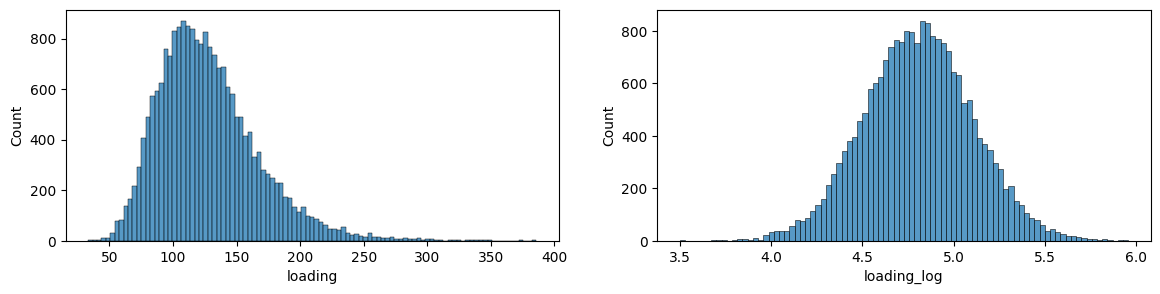

In [34]:
# 로그 변환이 어떤 효과를 보였는지, 보여주기 위한 참고용 코드입니다.
# 좌측으로 치우친 loading 변수가 log 변환을 통해 좌우 대칭형으로 변환되었음을 확인할 수 있습니다.

fig, axes = plt.subplots(1, 2, figsize=(14, 3) )
sns.histplot(data=df_prob2, x='loading', ax=axes[0])
sns.histplot(data=df_prob2, x='loading_log', ax=axes[1])
plt.show()

In [35]:
# 정규 분포와 얼마나 가까워졌는지 확인해보자.
from scipy.stats import kstest
from scipy.stats import norm, zscore
kstest(zscore(df_prob2['loading']), norm.cdf), kstest(zscore(df_prob2['loading_log']), norm.cdf)

(KstestResult(statistic=0.0600599455247498, pvalue=4.255982724723072e-67),
 KstestResult(statistic=0.0042631101250387715, pvalue=0.832889492249071))

## 단계 2-3

In [36]:
from scipy.stats import jarque_bera

In [37]:
# Group-By를 이용한 방법
B = (df_prob2.groupby('product_code')['loading_log'].apply(lambda x: jarque_bera(x)[1]) > 0.05).sum()
B

3

In [38]:
# 반복문을 이용한 방법
v_list = []
for i in df_prob2['product_code'].unique():
    v_list.append(jarque_bera(df_prob2.loc[df_prob2['product_code'] == i, "loading_log"])[1])
B = np.sum(np.array(v_list) > 0.05)
B

3

In [39]:
# 하드 코딩은 생략합니다.

## 단계 2-4

In [40]:
from scipy.stats import bartlett

In [41]:
# 메뉴얼을 보자
# bartlett?

In [42]:
# 방법 1 - groupby와 *를 활용한 리스트를 매개변수로 전달하여 코드를 최적화한 방법
# 위 메뉴얼을 보면 표본집단들을 별로 가변 매개변수 형식으로 받도록 함수를 만들었습니다.
# 리스트를 가변 매개 변수에 전달하는 방법으로 코드를 최적화합니다.
bartlett(*df_prob2.groupby('product_code')['loading_log'].agg(list).tolist())

BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675)

In [43]:
# 방법 2 - groupby 대신에 필터링으로 product_code별로 구분한 표본집단을 만듭니다.
v_list = []
for i in df_prob2['product_code'].unique():
    v_list.append(df_prob2.loc[df_prob2['product_code'] == i, "loading_log"])
bartlett(*v_list)

BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675)

In [44]:
# 방법 3 - product_code의 수가 많지 않아, 모든 과정을 하드코딩으로 해도 무방합다
v_A = df_prob2.loc[df_prob2['product_code'] == "A", 'loading_log']
v_B = df_prob2.loc[df_prob2['product_code'] == "B", 'loading_log']
v_C = df_prob2.loc[df_prob2['product_code'] == "C", 'loading_log']
v_E = df_prob2.loc[df_prob2['product_code'] == "E", 'loading_log']

bartlett(v_A, v_B, v_C, v_E)

BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675)

In [45]:
res = bartlett(*df_prob2.groupby('product_code')['loading_log'].agg(list).tolist())
C = res.pvalue
C

0.5873433093297675

## 단계 2-5

In [46]:
from scipy.stats import f_oneway

In [47]:
# *를 이용한 방법
res = f_oneway(*df_prob2.groupby('product_code')['loading_log'].agg(list).tolist())
D = res.pvalue
D

0.7733782072320899

In [48]:
# 다른 방법은 생략합니다.

### statsmodels 를 이용한 방법

In [49]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [50]:
C_ = C
del C # C에 변수값이 설정되어 있으면 아래 식(formula)을 해석하는 데 오류가 발생
loading_log_model = ols('loading_log ~ C(product_code)', data=df_prob2).fit()
C = C_

In [51]:
sm.stats.anova_lm(loading_log_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(product_code),3.0,0.098609,0.032870,0.371773,0.773378
Residual,21253.0,1879.053397,0.088414,NaN,NaN


## 단계 2-6

In [52]:
from scipy.stats import chi2_contingency

In [53]:
# 빈도수 테이블을 만듭니다.
df_conti = pd.crosstab(index=df_prob2['attribute_0'].str.cat(df_prob2['attribute_1']), 
                       columns=df_prob2['failure'])
res = chi2_contingency(df_conti)
# 유의 수준이 보통 5%이지만 이 문제는 1% 임을 유의 합니다.
E = 1 if res[0] < 0.01 else 0
res, E

((7.0400463075335615,
  0.029598749837407304,
  2,
  array([[4106.03584702, 1102.96415298],
         [4162.79042198, 1118.20957802],
         [8487.17373101, 2279.82626899]])),
 0)

B + C + D + E 의 값을 소수점 3째 자리에서 반올림하여 2째 자리까지 출력하라. 합을 구한 후에 반올림을 진행해야 한다는 점을 유의하시오.

예) 3.16

In [54]:
B + C + D + E

4.360721516561858

**시험장: 4.36, BDC: 4.36**

# 문제 3

**출제자 노트**

Area under of ROC curve 라는 지표를 사용합니다. 측정에는 Positive 확률과 실제 Label입니다. Accuracy나 f1_score는 예측 Label이 사용합니다. 

무턱대고 실제 Label을 넣으면 안 됩니다. 측정하는 지표가 어떤 것인지 주의해 주세요. 루프를 활용한 솔루션을 연습하고자 고안한 문제입니다.

## 단계 3-1

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score 
from sklearn.linear_model import LogisticRegression

# 중요!!!!
# accuracy_score와 f1_score는 Label값을 입력으로 널지만 
# roc_auc_score는 Positive인 확률을 넣습니다. 

In [56]:
X_cols_cont = ['measurement_{}'.format(i) for i in range(0, 18)] + ['loading']
X_cols_bool = ['na_1', 'na_2']
X_cols = X_cols_cont + X_cols_bool
target = 'failure'

df_prob3 = df_prob1.copy()
df_prob3['loading'] =df_prob3['loading'].fillna(df_prob3['loading'].mean())

## 단계 3-2

In [57]:
df_prob3_train, df_prob3_test = train_test_split(df_prob3, train_size=0.8, random_state=123, stratify=df_prob3[target])
# 시험장 버젼은 deep copy를 하지 않으면 경고가 발생. 경고를 회피하고 혹시나 있을 예상치 못한 간섭 현상을 예방하기 위해
df_prob3_train = df_prob3_train.copy()
df_prob3_test = df_prob3_test.copy()
df_prob3_train.shape, df_prob3_test.shape

((17166, 42), (4292, 42))

## 단계 3-3

In [58]:
std_scaler = StandardScaler()

df_prob3_train[X_cols_cont] = std_scaler.fit_transform(df_prob3_train[X_cols_cont])
df_prob3_test[X_cols_cont] = std_scaler.transform(df_prob3_test[X_cols_cont])

## 단계 3-4

In [59]:
df_prob3_train[['loading', 'measurement_17']].isna().sum()

loading           0
measurement_17    0
dtype: int64

In [60]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(df_prob3_train[X_cols], df_prob3_train[target])
# df_prob_3_train에 대한 roc_auc_score
roc_auc_score(df_prob3_train[target], clf.predict_proba(df_prob3_train[X_cols])[:, 1])

0.5952982435574312

In [67]:
# df_prob_3_test에 대한 roc_auc_score
A = roc_auc_score(df_prob3_test[target], clf.predict_proba(df_prob3_test[X_cols])[:, 1])
A

0.5792951262053387

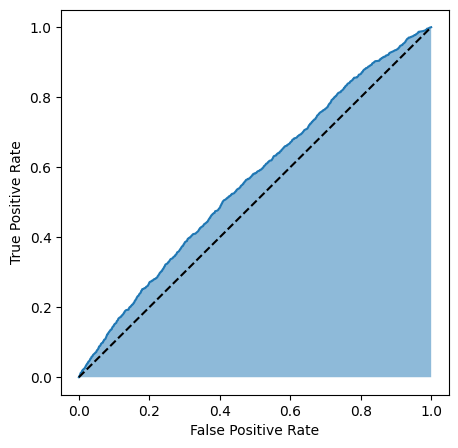

In [61]:
# ROC curve 그리기

df_roc = pd.DataFrame({'prob': clf.predict_proba(df_prob3_test[X_cols])[:, 1],
 'label': df_prob3_test[target]})
df_roc.sort_values('prob', ascending=False, inplace=True) # Positive 확률에 따른 False Positive 수를 구하기 위해 정렬
df_roc['fp'] = df_roc['label'].cumsum() # Positive 확률까지의 누적 False Positive 수
df_roc = df_roc['fp'].value_counts().sort_index().cumsum().reset_index() # False Positive에 따른 True Positive 수를 구한다.
df_roc.columns = ['tp', 'fp']
df_roc['fp'] = df_roc['fp'].shift(1).fillna(0) # shift를 해야만 False Positive 따른 True Positive 수가 맞춰진다.
df_roc['tpr'] = df_roc['tp'] / df_roc['tp'].iloc[-1] # Rate로 환산, 마지막 수는 True의 수이다.
df_roc['fpr'] = df_roc['fp'] / df_roc['fp'].iloc[-1] # Rate로 환산, 마지막 수는 False의 수이다.

plt.figure(figsize=(5, 5))
plt.plot(df_roc['fpr'], df_roc['tpr'])
plt.fill_between(df_roc['fpr'], df_roc['tpr'], np.zeros_like(df_roc['tpr']), alpha=0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## 단계 3-5

In [68]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold

c:\users\user\python3.7\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [69]:
sfs = SequentialFeatureSelector(
    LogisticRegression(solver='lbfgs'),
    k_features = 'best',
    forward = True,
    floating = False,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
)

In [70]:
sfs.fit(df_prob3_train[X_cols], df_prob3_train[target])

SequentialFeatureSelector(clone_estimator=True,
                          cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='warn',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='lbfgs',
                                                       tol=0.0001, 

In [71]:
# 전진 선택법 수행 결과
sfs.subsets_

{1: {'feature_idx': (18,),
  'cv_scores': array([0.60037345, 0.57115188, 0.58550503, 0.58230804, 0.60340806]),
  'avg_score': 0.5885492900130771,
  'feature_names': ('loading',)},
 2: {'feature_idx': (17, 18),
  'cv_scores': array([0.60267405, 0.57143555, 0.58795125, 0.58050448, 0.60829591]),
  'avg_score': 0.5901722458803432,
  'feature_names': ('measurement_17', 'loading')},
 3: {'feature_idx': (4, 17, 18),
  'cv_scores': array([0.60560384, 0.56745342, 0.59135025, 0.58167225, 0.60799722]),
  'avg_score': 0.5908153976487898,
  'feature_names': ('measurement_4', 'measurement_17', 'loading')},
 4: {'feature_idx': (1, 4, 17, 18),
  'cv_scores': array([0.60829203, 0.56526443, 0.58923045, 0.58339007, 0.60951609]),
  'avg_score': 0.5911386131847978,
  'feature_names': ('measurement_1',
   'measurement_4',
   'measurement_17',
   'loading')},
 5: {'feature_idx': (1, 4, 17, 18, 19),
  'cv_scores': array([0.60964655, 0.56444317, 0.59139146, 0.58382766, 0.60829642]),
  'avg_score': 0.5915210536

In [72]:
# 전진 선택법을 통해 도출한 속성
sfs.k_feature_names_, sfs.k_feature_idx_

(('measurement_1',
  'measurement_4',
  'measurement_14',
  'measurement_17',
  'loading',
  'na_1'),
 (1, 4, 14, 17, 18, 19))

## 단계 3-6

In [73]:
X_cols_sfs = list(sfs.k_feature_names_)
lr = LogisticRegression(solver='lbfgs')
lr.fit(df_prob3_train[X_cols_sfs], df_prob3_train[target])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
B = roc_auc_score(df_prob3_test[target], lr.predict_proba(df_prob3_test[X_cols_sfs])[:, 1])
B

0.5838326230092876

In [75]:
A - B

-0.004537496803948882

**시험장: -0.005, BDC: -0.003**

# 문제 4



**출제자 노트**

시험의 대응의 하나의 축은 문제에 대한 이해력입니다. Linear Discriminant Model을 주제로한 서사가 담겨 있습니다. 이러한 서사에 대한 대응력을 높혀 봅시다. 그리고 Linear Discriminant Model를 고른 것은 다소 생소한 모델이기 때문이고, 지도 학습으로 쓸 수 있으면서, 속성을 추출하는 데도 사용하는 특이한 면이 있어 다루어 봤습니다. 다소 생소한 모델이 나와도 당황하지 마시고, sklearn의 모듈의 기본 구성 (fit, transform, predict)를 생각하면 쉽게 접근이 가능 합니다. 이와 함께 PCA 문제는 자주 나오는 패턴이라 담았습니다.

## 단계 4-1

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import spearmanr

In [77]:
lda = LinearDiscriminantAnalysis() # 모델 생성
# 입력 변수리스트를 변수로 만들자. 실수를 줄일 수 있다.
all_m_cols = ['measurement_{}'.format(i) for i in range(0, 18)]
lda.fit(df_prob3_train[all_m_cols], df_prob3_train['failure'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [78]:
# lda 모델을 분류기로도 쓸 수 있다.
roc_auc_score(df_prob3_train['failure'], lda.predict_proba(df_prob3_train[all_m_cols])[:, 1])

0.5340281034067301

In [79]:
# test 셋에도 적용해 보자
roc_auc_score(df_prob3_test['failure'], lda.predict_proba(df_prob3_test[all_m_cols])[:, 1])

0.5233319056281441

In [80]:
res = spearmanr(lda.transform(df_prob3_train[all_m_cols])[:, 0],
          df_prob3_train['loading'])
A = res.pvalue
res, A # loading과 관측값과는 연관성있다고 보기 힘들다.

(SpearmanrResult(correlation=0.0029462997112993335, pvalue=0.6995009550811424),
 0.6995009550811424)

In [81]:
# 참고 pearson correlation
from scipy.stats import pearsonr
pearsonr(lda.transform(df_prob3_train[all_m_cols])[:, 0],
          df_prob3_train['loading'])

(0.007688137797842969, 0.31382219694393537)

## 단계 4-2

In [82]:
from sklearn.decomposition import PCA
X_pca_cols = ['measurement_{}'.format(i) for i in range(0, 18)] # PCA 입력변수명
pca_cols = ['pca_{}'.format(i) for i in range(0, 18)] # PCA 파생 변수명

In [83]:
df_prob4_train = df_prob3_train.copy()
df_prob4_test = df_prob3_test.copy()

In [84]:
pca = PCA() #  모든 컴포난트를 가져와서 넣자
pca.fit(df_prob4_train[X_pca_cols])
df_prob4_train[pca_cols] = pd.DataFrame(pca.transform(df_prob4_train[X_pca_cols]), index=df_prob4_train.index)
df_prob4_test[pca_cols] = pd.DataFrame(pca.transform(df_prob4_test[X_pca_cols]), index=df_prob4_test.index)

## 단계 4-3

In [85]:
X_prob4 = ['loading']

In [86]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(df_prob4_train[X_prob4], df_prob4_train[target])
best_auc = roc_auc_score(df_prob4_test[target], lr.predict_proba(df_prob4_test[X_prob4])[:, 1])
best_auc

0.5778277926972065

In [87]:
best_X_cols = X_prob4.copy()
for i in range(18):
    X_prob4.append('pca_{}'.format(i))
    lr.fit(df_prob4_train[X_prob4], df_prob4_train[target])
    cur_auc = roc_auc_score(df_prob4_test[target], lr.predict_proba(df_prob4_test[X_prob4])[:, 1])
    print(i, cur_auc)
    if cur_auc > best_auc:
        best_X_cols = X_prob4.copy()
        best_auc = cur_auc
best_X_cols,  best_auc

0 0.579565141627812
1 0.5784170060859327
2 0.5786498903164131
3 0.5801256923420173
4 0.5805735466314028
5 0.5811103203542446
6 0.581757510516433
7 0.5808025223153578
8 0.5801787834323228
9 0.5801664063683251
10 0.5794231311040503
11 0.5785678108393766
12 0.5782202759108135
13 0.5782310244137587
14 0.5776818736269195
15 0.5772988360674158
16 0.5768773644670778
17 0.5771252314592396


(['loading', 'pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6'],
 0.581757510516433)

In [88]:
B = np.sum(pca.explained_variance_ratio_[:7])
B

0.49053704530610626

In [89]:
A + B

1.1900380003872486

**시험장: 1.19, BDC: 1.19**

# 문제 5

**출제자 노트**

문제에서 주는 힌트가 모두 도움이 되지 않을 수 있습니다. 취사 선택해야 할 경우가 있죠. 이 솔루션에서는 3가지 솔루션을 제시했습니다. 어떤 방법으로 어떤 모듈을 택하느냐에 따라 답은 같지만, 해결 방법의 복잡도는 상당히 차이가 납니다. 교차 검증을 주제로 대응 방법을 연습해 봅시다.

## 단계 5-1

In [84]:
from sklearn.model_selection import StratifiedKFold 
# 혹시 문제에 대한 StratifiedGroupedKFold가 적합하지 않느냐라고 챌린지를 한다면,
# 타당하지만 배운 내용이 아니라 사용하지는...
import itertools
from sklearn.ensemble import RandomForestClassifier

In [85]:
X_cols = ['loading'] + m_cols + ['na_1', 'na_2']
kf = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

### 방법 1

GridSearchCV 활용

In [86]:
# GridSearchCV 이용하기
from sklearn.model_selection import GridSearchCV
est = RandomForestClassifier(random_state=123)
clf = GridSearchCV(estimator=est, 
                   param_grid={'n_estimators': [5, 10, 15], 
                               'max_depth': [5, 6, 7], 
                               'min_samples_split': [256, 512]}, 
                   scoring='roc_auc', cv=kf)
clf.fit(df_prob3_train[X_cols], df_prob3_train['failure'])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=123,
                                              verbose=0, warm_start=

In [87]:
clf.best_params_, clf.best_score_

({'max_depth': 7, 'min_samples_split': 512, 'n_estimators': 15},
 0.5745230040906384)

### 방법 2

cross_val_score 활용

In [88]:
# cross_val_score 이용하기
from sklearn.model_selection import cross_val_score
best_auc = 0
best_param = None
# 3중 루프를 돌리거나, recursive 함수 호출로 조합을 만들 수도 있겠지만 
# itertools의 product 함수를 이용하여 간편하게 가져온다.
for n_estimators, max_depth, min_samples_split in itertools.product([5, 10, 15], [5, 6, 7], [256, 512]):
    clf = RandomForestClassifier(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 min_samples_split=min_samples_split, random_state=123)
    cur_auc = np.mean(cross_val_score(clf, df_prob3_train[X_cols], df_prob3_train['failure'], cv=kf, scoring='roc_auc'))
    if best_auc < cur_auc:
        best_auc = cur_auc
        best_param = (n_estimators, max_depth, min_samples_split)
    print(n_estimators, max_depth, min_samples_split, cur_auc)

5 5 256 0.5547115468443294
5 5 512 0.5617150416141751
5 6 256 0.5568999583940097
5 6 512 0.5623239919998733
5 7 256 0.5567633668997499
5 7 512 0.5642015275666604
10 5 256 0.5654552370913933
10 5 512 0.5707474621000601
10 6 256 0.5681316681217556
10 6 512 0.5680847464819798
10 7 256 0.5670255107788329
10 7 512 0.5724060304780464
15 5 256 0.5692073209929452
15 5 512 0.5716407241067258
15 6 256 0.5706158790202794
15 6 512 0.5699305861415821
15 7 256 0.5699417404975209
15 7 512 0.5745226991354744


In [89]:
best_param, best_auc # 미세하게 차이남, floating point 연산 방법 차이

((15, 7, 512), 0.5745226991354744)

### 방법 3

루프 활용

In [90]:
# 루프를 활용하여 구하기
best_auc = 0
best_param = None
for n_estimators, max_depth, min_samples_split in itertools.product([5, 10, 15], [5, 6, 7], [256, 512]):
    clf = RandomForestClassifier(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 min_samples_split=min_samples_split, random_state=123)
    auc_list = []
    for train_index, test_index in kf.split(df_prob3_train[X_cols], df_prob3_train['failure']):
        clf.fit(df_prob3_train.iloc[train_index][X_cols], df_prob3_train.iloc[train_index]['failure'])
        y_hat = clf.predict_proba(df_prob3_train.iloc[test_index][X_cols])[:, 1]
        auc = roc_auc_score(df_prob3_train.iloc[test_index]['failure'], y_hat)
        auc_list.append(auc)
    cur_auc = np.mean(auc_list)
    if best_auc < cur_auc:
        best_auc = cur_auc
        best_param = (n_estimators, max_depth, min_samples_split)
    print(n_estimators, max_depth, min_samples_split, cur_auc)

5 5 256 0.5547115468443294
5 5 512 0.5617150416141751
5 6 256 0.5568999583940097
5 6 512 0.5623239919998733
5 7 256 0.5567633668997499
5 7 512 0.5642015275666604
10 5 256 0.5654552370913933
10 5 512 0.5707474621000601
10 6 256 0.5681316681217556
10 6 512 0.5680847464819798
10 7 256 0.5670255107788329
10 7 512 0.5724060304780464
15 5 256 0.5692073209929452
15 5 512 0.5716407241067258
15 6 256 0.5706158790202794
15 6 512 0.5699305861415821
15 7 256 0.5699417404975209
15 7 512 0.5745226991354744


In [91]:
best_param, best_auc

((15, 7, 512), 0.5745226991354744)

## 단계 5-2

In [92]:
clf = RandomForestClassifier(max_depth=7, min_samples_split=512, n_estimators=15, random_state=123)
clf.fit(df_prob3_train[X_cols], df_prob3_train['failure'])
A = roc_auc_score(df_prob3_test['failure'], clf.predict_proba(df_prob3_test[X_cols])[:, 1])
A

0.5687712018291998

**0.569, 0.569**

# 문제 6

[Kaggle 형] train.csv을 학습 데이터로 사용하여, failure를 맞추는 분류 모델을 만들고, test.csv 테스트 데이터에 대한 failure일 확률을 다음과 같은 포맷으로 submission.csv라는 이름으로 만들어라. 측정에 대한 지표는 area under of ROC curve 이다.

Id,failure

26570, 0.1

26571, 0.2

....




**출제자 노트**

이전 문제에서 Kaggle형 문제에 대응할 만한 솔루션이 있다면 가져와서 적용하면 훨씬 접근이 쉬워집니다. 적용할 방법이 있는 지 살펴 보고 가져와서 적용해 봅시다.

In [93]:
# 실제 시험에서는 정답을 주지 않지만, 
# 본 과제는 연습이 목표이므로, 정답을 포함했다.
# 정답 데이터셋을 불러온다
df_ans = pd.read_csv('test_prob_ans.csv', index_col='id')
df_ans.head()

,failure
id,
16115,1
16116,0
16117,0
16118,1
16119,0


In [94]:
# Kaggle형은 별도의 노트북으로 만들도록 합니다. 위의 코드 없이 별도로 돌려도 작동할 수 있게 만들었습니다.

import pandas as pd

df_org = pd.read_csv('train_prob.csv', dtype={'failure': 'int8', 'attribute_2': 'int8', 'attribute_3': 'int8'}, index_col='id')
df_test = pd.read_csv('test_prob.csv', dtype={'failure': 'int8', 'attribute_2': 'int8', 'attribute_3': 'int8'}, index_col='id')

df_prob6_train = df_org.copy()
df_prob6_test = df_test.copy()

### 방법 1

좋은 성능을 보인 모델을 떼와서 적용해보자

In [95]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# 문제에서 유효했던 것을 집대성하여 Kaggle형에서 사용하자.
# 동일한 과정을 테스트에 적용할 필요가 있는 경우에
# 복잡한 과정이 필요하다면 함수화하여 소스코드의 복잡도를 줄이고, 실수를 줄이자.
def preproc(df, std_scaler=None):
    # 결측치 파생 변수 사용 
    df[['na_1', 'na_2']] = df[['measurement_3', 'measurement_5']].isna()
    
    # 결측치 보정
    # 데이터처리기를 사용할 때, 
    # 보통 train 셋을 대상으로 fit하고 test에서는 transform이지만
    # 위에서도 언급했지만,
    # 이 과정은 product_code 별로 변환로 IterativeImputer를 적용하라고 했다. 
    # test에서 나오는 product_code는 train에 나오지 않으므로,
    # 구분할 이유가 없는 것이다.
    # 이 점을 유념하여 혼선이 없기를 바란다.
    itr_cols = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
    for c in df['product_code'].unique():
        imp = IterativeImputer(LinearRegression(), random_state=123)
        df.loc[df['product_code'] == c, itr_cols] = imp.fit_transform(df.loc[df['product_code'] == c, itr_cols])
    for i in range(10, 17):
        col = 'measurement_{}'.format(i)
        df[col] = df.groupby('product_code')[col].transform(lambda x: x.fillna(x.mean()))
    df['loading'] = df['loading'].fillna(df['loading'].mean())
    X_std_cols = ['loading'] + ['measurement_{}'.format(i) for i in range(0, 18)]
    
    # 팁: 학습셋에서만 fit이 필요한 경우에는 None으로 받고 이를 반환하여 
    # 테스트셋에서는 학습셋에서 fit했던 것을 사용하도록한다.
    if std_scaler is None: # 학습셋일 경우에 
        std_scaler = StandardScaler()
        df[X_std_cols] = std_scaler.fit_transform(df[X_std_cols])
    else: # 학습셋에서 썼던 변환기 사용
        df[X_std_cols] = std_scaler.transform(df[X_std_cols])
    return df, std_scaler

In [96]:
df_prob6_train_proc, std_scaler = preproc(df_prob6_train)
df_prob6_test_proc, _ = preproc(df_prob6_test, std_scaler)

In [97]:
from sklearn.linear_model import LogisticRegression
# 전진 선택법으로 추려 낸 입력 변수
sel_feat = ['loading',  'na_1', 'measurement_1', 'measurement_4',  'measurement_14', 'measurement_17']
clf = LogisticRegression(solver='lbfgs')
clf.fit(df_prob6_train_proc[sel_feat], df_prob6_train_proc['failure'])
roc_auc_score(df_prob6_train_proc['failure'], clf.predict_proba(df_prob6_train_proc[sel_feat])[:, 1])

0.5916532449664929

## 방법 2


sklearn.compose.ComposeTransformer과 
sklearn.pipeline.make_pipeline을  통한 

빠르고 다양한 처리과정 구성

In [98]:
df_prob6_train = df_org.copy()
df_prob6_test = df_test.copy()

In [99]:
# test에도 동일하게 전처리 적용
df_prob6_train[['na_1', 'na_2']] = df_prob6_train[['measurement_3', 'measurement_5']].isna()
df_prob6_test[['na_1', 'na_2']] = df_prob6_test[['measurement_3', 'measurement_5']].isna()
itr_cols = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
for c in df_prob6_train['product_code'].unique():
    imp = IterativeImputer(LinearRegression(), random_state=123)
    df_prob6_train.loc[df_prob6_train['product_code'] == c, itr_cols] =\
            imp.fit_transform(df_prob6_train.loc[df_prob6_train['product_code'] == c, itr_cols])

for c in df_prob6_test['product_code'].unique():
    imp = IterativeImputer(LinearRegression(), random_state=123)
    df_prob6_test.loc[df_prob6_test['product_code'] == c, itr_cols] =\
            imp.fit_transform(df_prob6_test.loc[df_prob6_test['product_code'] == c, itr_cols])
df_prob6_train['loading'] = df_prob6_train['loading'].fillna(df_prob6_train['loading'].mean())
df_prob6_test['loading'] = df_prob6_test['loading'].fillna(df_prob6_test['loading'].mean())

imp_mean_cols = ['measurement_{}'.format(i) for i in range(10, 17)]
df_prob6_train[imp_mean_cols] = df_prob6_train.groupby('product_code')[imp_mean_cols].transform(lambda x: x.fillna(x.mean()))
df_prob6_test[imp_mean_cols] = df_prob6_test.groupby('product_code')[imp_mean_cols].transform(lambda x: x.fillna(x.mean()))

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

X_cols = ['loading', 'na_1', 'na_2'] + ['measurement_{}'.format(i) for i in range(0, 18)]
target = 'failure'

In [101]:
# 문제 4의 처리 과정
ct_1 = ColumnTransformer(
    [('loading', StandardScaler(), ['loading']),
     ('pca_std', make_pipeline(StandardScaler(), PCA(n_components=7)), ['measurement_{}'.format(i) for i in range(0, 18)]),
     ('pt', 'passthrough', ['na_1', 'na_2'])]
)

In [102]:
clf_1 = make_pipeline(ct_1, LogisticRegression(solver='lbfgs'))
clf_1.fit(df_prob6_train[X_cols], df_prob6_train[target])
roc_auc_score(df_prob6_train[target], clf_1.predict_proba(df_prob6_train[X_cols])[:, 1])

0.5920062838657576

In [103]:
ct_2 = ColumnTransformer(
    [('std', StandardScaler(), ['loading'] + ['measurement_{}'.format(i) for i in range(0, 18)]),
     ('pt', 'passthrough', ['na_1', 'na_2'])]
)
sfs = SequentialFeatureSelector(
    LogisticRegression(solver='lbfgs'),
    k_features = 'best',
    forward = True,
    floating = False,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
)

In [104]:
# 문제 3이 처리 과정

clf_2 = make_pipeline(ct_2, sfs, LogisticRegression(solver='lbfgs'))
clf_2.fit(df_prob6_train[X_cols], df_prob6_train[target])
roc_auc_score(df_prob6_train[target], clf_2.predict_proba(df_prob6_train[X_cols])[:, 1])

0.5919719087170596

In [105]:
# 두 개를 ensemble

from sklearn.ensemble import VotingClassifier

clf_e = VotingClassifier([
    ('clf_1', clf_1),
    ('clf_2', clf_2)
], voting='soft')

clf_e.fit(df_prob6_train[X_cols], df_prob6_train[target])
roc_auc_score(df_prob6_train[target], clf_e.predict_proba(df_prob6_train[X_cols])[:, 1])

0.5925813870071603

In [106]:
# 출력 파일 제작시 index를 첨부여부를 명확하게 해야 합니다.
# DataFrame 사용 스타일에 따라 ID를 Index에 두고 쓰는 사람도 있고, 
# 일반 컬럼에 두고 쓰는 사람이 있을 텐데
# 본 솔루션은 인덱스에 row ID를 담고 있어 index를 포함하여 출력 파일을 제작했습니다.
df_submit = pd.DataFrame({'failure': clf.predict_proba(df_prob6_test_proc[sel_feat])[:, 1]}, 
             index=df_prob6_test_proc.index)
df_submit.to_csv('answer6.csv', index=True)
!head answer6.csv

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [107]:
df_submit.head(5)

,failure
id,
16115,0.145254
16116,0.178405
16117,0.215412
16118,0.263162
16119,0.215025


In [108]:
# 정답으로 제출한 솔루션의 성능 측정해보자.
roc_auc_score(df_ans['failure'], clf.predict_proba(df_prob6_test_proc[sel_feat])[:, 1])

0.5883705035971223

In [109]:
# 정답으로 제출한 솔루션의 성능 측정해보자.
roc_auc_score(df_ans['failure'], clf_1.predict_proba(df_prob6_test[X_cols])[:, 1])

0.590693120503597

In [110]:
# 정답으로 제출한 솔루션의 성능 측정해보자.
roc_auc_score(df_ans['failure'], clf_2.predict_proba(df_prob6_test[X_cols])[:, 1])

0.5884543615107913

In [111]:
# 정답으로 제출한 솔루션의 성능 측정해보자.
roc_auc_score(df_ans['failure'], clf_e.predict_proba(df_prob6_test[X_cols])[:, 1])

0.5901843525179856